<a href="https://colab.research.google.com/github/Mayar215999/data-science-project/blob/main/Machine_learning_foundation_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

Populating the interactive namespace from numpy and matplotlib


Null Hypothesis
I claim that I can use mystical abilities to predict the outcome of coin flips.

You don't think I can.

How can we test it?

We do an experiment in which I call 100 coin flips. I get 57 right.

Am I special or not?

Determining the Null and Alternative Hypothesis
Write the null and alternative hypotheses!

Null:

Alternative:

Null: I'm not special; my true rate of flip prediction is 0.5.

But even under this hypothesis, I could get 57 out of 100 right. So did I get lucky (by random chance) or am I mystical?

Alternative: My true rate of flip prediction is greater than 0.5.

The thing we're measuring from the experiment, or test statistic, is the number of correct flip predictions out of 100.







If the null hypothesis is correct, the test statistic is binomial distributed with parameters n = 100 and p = 0.5. That is, if we repeated the whole experiment many times, we would see such a distribution for all the results.

So if the null hypothesis is correct, how likely is it that I got 57 or more coin flips correct?

Before we check (really, before we do the experiment) we decide what would convince us that I have ESP. The choice of a cutoff at 5% probability is common. That is, if we would only see data as extreme as we've seen less than 5% of the time, we'll say that seems too unlikely and we will conclude that we don't think the null hypothesis is true.

We have two outcomes, one with probability (p) and the other with probability (1-p) of happening (remember the axioms of probability?), so we know the binomial distribution is the right tool for this analysis.

In the case of the binomial distribution, which is discrete and not too complicated mathematically, we could just work out the probability. But in general we'll rely on some existing functionality. (In a traditional statistics class, this is the part where we'd turn to a table in the back of the book.)

In [2]:
from scipy.stats import binom
prob = 1 - binom.cdf(56, 100, 0.5)

print(str(round(prob*100, 1))+"%")

9.7%


The probability of getting 57 or more correct is about 9.7%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't have mystical powers.

Conversely, we can figure out what the 95% cutoff is beforehand.

Exercise
Find the number of coin flips a person would need to guess correctly for us to believe they're clairvoyant.

In [3]:
from scipy.stats import binom
print(binom.ppf(0.95,100,0.5)+1)

59.0


Which means, one should get 59 tosses or more to be considered clairvoyant. And we will say the person has predictive power with a confidence level of 95%.


A More Specific Claim
So far so good. What if instead I said, "I'm not perfect, but I can predict coin tosses 60% of the time. Which is still good, which is still valuable."

What do we do in this case? Sure, we can do exactly what we did earlier and when I predict 57 times, we can reject my claim.

But what if I say, "Wait a minute. I said 60 and I got 57, that sounds pretty good to me."

Interpretation:

"I happened to have a poor guessing day, and that's why my results aren't quite statistically significant!"

What do we say to that? The issue here is that there is no longer a single null hypothesis that we prove or disprove. Instead, we have two competing hypotheses: * Hypothesis A: There is no predictive power * Hypothesis B: There is a 60% predictive power

Each is a normal curve, with one centered at 50% and the other at 60%.

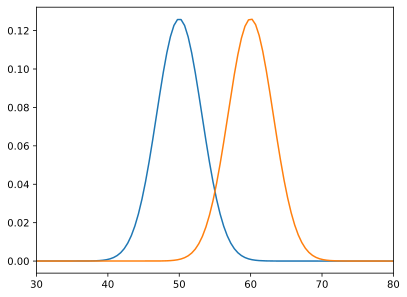

In [4]:
mu = 50
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 60
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 200)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.xlim(30,80)
plt.show()

In [5]:
print (1 - binom.cdf(57, 100, 0.5))
print (binom.cdf(57, 100, 0.6))

0.06660530960360689
0.3032601298434457


What now? There just isn't enough data to achieve a confidence of 95%. There are few things we can do.








1) Decrease confidence
Since we have a claim at 50 and 60, we can pick the mid-point, which is 55. We can say if I can predict over 55, then I have predictive power. This would mean that we have decreased our confidence level.

In [6]:
print (1 - binom.cdf(55, 100, 0.5))
print (binom.cdf(54, 100, 0.6))

0.13562651203691767
0.1310904526197477


** At an 87% percent confidence level, we can say that I have some predictive power, since I got 57 tosses correct.**

Not ideal; we picked a number, which is prone to bias, rather than a confidence interval.








2) Be biased
But it is not neccessary that we bias the two hypotheses equally and pick the midpoint the way we did. The cut-off point can be anywhere. Currently, our error margins are even. The chance that someone has predictive power and we say no is 13% and the chance that someone has no power and we say they do is also 13%. As we change the cutoff, one error goes down and the other goes way up.

For example, if we stuck with the original 95% on a coin being fair:

In [7]:
binom.ppf(0.95, 100, 0.5) #this is the inverse of the cdf functions above

58.0

In [8]:
print (1-binom.cdf(58, 100, 0.5))
print (binom.cdf(58, 100, 0.6))

0.04431304005703385
0.37746732387782933


5% chance someone has no power and we say they do. But a 38% chance someone has predictive power and we say no. Which depending on the problem might be exactly what we want. These two types of errors are called Type I and Type II. And we have the choice of biasing against one or the other.








3) Increase sample size
The best scenario though is to increase the sample size. Imagine what happens we did 1000 tosses instead of 100.

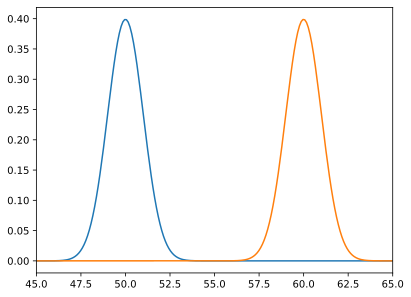

In [9]:
mu = 50
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 60
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.xlim(45,65)
plt.show()





The two normal curves are completely seperated now.

In [10]:
print (binom.ppf(0.95,1000,0.5))
print (binom.ppf(0.05,1000,0.6))

526.0
574.0


In [11]:
print (1-binom.cdf(550, 1000, 0.5))
print (binom.cdf(550, 1000, 0.6))

0.0006958707972110068
0.0007412028990060172


With a cutoff of 550, both our errors come down to under 0.1%.

part 2
Hypothesis Testing

Setup
For this lab, we will be using the following libraries:

pandas for managing the data.
numpy for mathematical operations.
seaborn for visualizing the data.
matplotlib for visualizing the data.
scipy.stats for statistical analysis.
statsmodels for statistical analysis.

Installing Required Libraries

In [12]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [13]:
!pip install pandas numpy seaborn matplotlib scipy statsmodels skillsnetwork


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.6 MB/s eta 0:00:00


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import skillsnetwork

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


Reading and understanding our data
For this lab, we will be using the insurance.csv file, hosted on IBM Cloud object.

This dataset contains information about age, sex, BMI, the number of children, whether the client is smoker or non-smoker, region where the client lives, and the charges to their insurance company.

Let's read the data into pandas data frame and look at the first 5 rows using the head() method.

In [16]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/insurance.csv'

await skillsnetwork.download_dataset(URL)
data = pd.read_csv('insurance.csv')

data.head()

Saved as 'insurance.csv'


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


According to the brief preview of our data, we will define the 'charges' to be our response variable, and 'age', 'sex', 'bmi', 'children', 'smoker', and 'region' to be our predictor variables. In this lab, we will test how our predictor variables influence the insurance 'charges'.

Steps in Hypothesis Testing
Example 1
In this first example, we will show how to prove (or disprove), with statistical evidence, that the BMI of females is different from that of males.

1. Choose a sample statistic
The first step in hypothesis testing is to choose a sample test statistic. Hypothesis testing allows us to check the sample statistic against a statistic of another sample or population. Let 𝜇1 be the population mean for BMI of males and 𝜇2 be the the population mean for BMI of females. We will compare these mean values, :
𝜇
_
1
 and
𝜇
_
2
, statistically.

2. Define hypothesis (Null and Alternative)
The next step is to define the hypothesis to be tested. Hypothesis is defined in two ways - null hypothesis and alternative hypothesis. Null hypothesis is a statistical hypothesis which assumes that the difference in observations is due to a random factor. It is denoted by Ho. Alternative hypothesis is the opposite of null hypothesis. It assumes that the difference in observations is the result of a real effect. The alternate hypothesis is denoted by H1.

𝐻
0
:
𝜇
1
−
𝜇
2
=
0
 There is no difference between the BMI of male and BMI of female.
𝐻
𝐴
:
𝜇
1
−
𝜇
2
≠
0
 There is a difference between the BMI of male and BMI of female.

To set the criteria for a decision, we state the level of significance for a test. It could be 5%, 1% or 0.5%. Based on the level of significance, we can make a decision whether to accept the null hypothesis and reject the alternate, and vise versa.

The diagram above describes the principles of hypothesis testing. We will choose 5% significance level. Therefore, our
𝛼
=
0.05
. Since we have a 2-tailed test, we have to divide alpha by 2, which gives us 0.025. So, if the calculated p-value is less than alpha, we will reject the null hypothesis. The significance level is based on the business requirements. If you would like to learn more about the statistical significance, please visit this wikipedia link.

In this lab, we will use one of the t-test, z-score, f-score or chi-squared statistics to evaluate our results.

A t-test is used for testing the mean of one population against a standard or comparing the means of two populations if you do not know standard deviation of the the population and when you have a limited sample (n < 30). If you know the standard deviation of the populations , you may use a z-test.

A z-test is used for testing the mean of a population versus a standard, or comparing the means of two populations, with large (n ≥ 30) samples, whether you know the population standard deviation or not. It is also used for testing the proportion of some characteristic versus a standard proportion, or comparing the proportions of two populations.

An f-test is used to compare variances between 2 populations. The samples can be any size. It is the basis of ANOVA.

chi-squared test is used to determine whether there is a statistically significant difference between the expected and the observed frequencies in one or more categories of a contingency table. A contingency table is a tabular representation of categorical data. It shows the frequency distribution of the variables.

To learn more about t-test, z-score, f-score or chi-squared statistics and contingency tables, please visit their corresponding wikipedia links.

4. Evaluate and interpret the result
First, let's get all observations for females and males by using the loc() function.

In [19]:
female=data.loc[data.sex=="female"]
male=data.loc[data.sex=="male"]

In [20]:
f_bmi = female.bmi
m_bmi = male.bmi

<Axes: xlabel='bmi', ylabel='Density'>

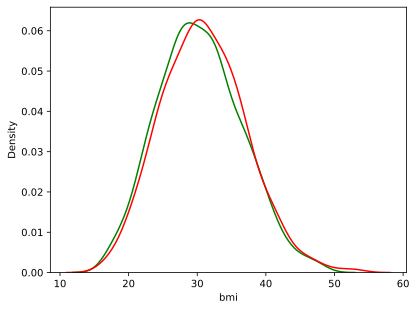

In [21]:
sns.distplot(f_bmi,color='green',hist=False)
sns.distplot(m_bmi,color='red',hist=False)

In [22]:
female.bmi.mean()

30.37774924471299

In [23]:
male.bmi.mean()

30.943128698224854

In [24]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(m_bmi, f_bmi)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  1.696752635752224 , p_value1 =  0.08997637178984932


In [25]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between bmi of females and bmi of males.")

else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.")

Conclusion: since p_value 0.08997637178984932 is greater than alpha 0.05 
Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.


Conclusion: We fail to reject the null hypothesis and can conclude that there is no difference between the female and male bmi.

Example 2
In this example, we would like to prove (or disprove) that the medical claims made by the people who smoke are greater than those who don't.

We will compare the mean values (𝜇) of population of people who smoke and those who do not smoke. First, we need to calculate the mean values of smoking and non smoking populations.

In [26]:
smoker = data.loc[data.smoker=="yes"]
smoker_char = smoker.charges
sch_mean = smoker_char.mean()
sch_mean

32050.23183153284

In [27]:
nonsmoker = data.loc[data.smoker=="no"]
nonsmoker_char = nonsmoker.charges

Exercise 1
Calculate population mean of the nonsmokers

In [28]:
nsch_mean = nonsmoker_char.mean()
nsch_mean

8434.268297856204

Now, let's define our null and alternative hypothesis.

𝐻
0
:
𝜇
1
≤
𝜇
2
 The average charges of smokers are less than or equal to nonsmokers.
𝐻
𝐴
:
𝜇
1
>
𝜇
2
 The average charges of smokers are greater than or equal to nonsmokers.

The '>' sign in the alternate hypothesis indicates the test is right tailed. To compare the mean values of smoking and nonsmoking populations, we will use a t-test. If z-values (calculated from a t-test) fall into the area on the right side of a distribution curve, this would cause us to reject the null hypothesis.

Now, let's plot our smoking versus nonsmoking populations by using seaborn boxplot() function. It is always useful to have a visual representation of the data that we are working with.

[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

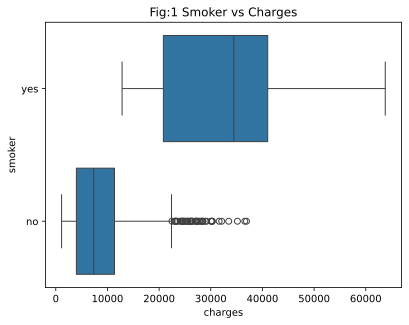

In [29]:
sns.boxplot(x=data.charges,y=data.smoker,data=data).set(title="Fig:1 Smoker vs Charges")

In [30]:
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(smoker_char, nonsmoker_char)
p_value_onetail=p_value2/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

t_value = 46.66492117272371 , p_value =8.271435842179102e-283 , p_value_onetail = 4.135717921089551e-283


Exercise 2
Use print() function to state your conclusions based on the calculated statistics. What are the conclusions?

In [33]:
# Use proper indentation when executing the code below
if p_value2:
    pass # Add a placeholder statement or the appropriate code
else:
    print("Conclusion:Since p value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to reject null hypothesis that average charges for smokers are less than nonsmoker.")

Example 3
In this example, using the statistical evidence, we will compare the BMI of women with no children, one child, and two children.

Now, let's define our null and alternative hypothesis.

𝐻
0
:
𝜇
1
=
𝜇
2
=
𝜇
3
 The mean BMI of women with no children , one child, and two children are the same.
𝐻
𝐴
:
 At least one of the means for women's BMI is not the same.

For this example, we will use a one-way ANOVA and f-score statistic to evaluate the variances of these three different populations. We will set alpha value to be 0.05.

First, we need to filter data for women with 0, 1 and 2 children.

In [34]:
female_children = female.loc[female['children']<=2]

Saved as 'insurance.csv'
children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64
nsch_mean = 8434.268297856204
sch_mean = 32050.23183153284


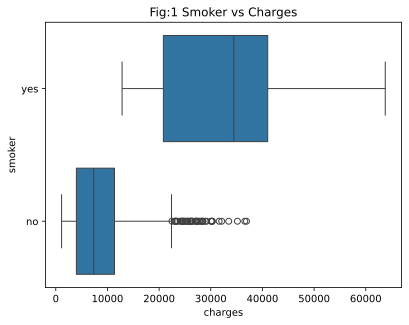

t_value = 46.66492117272371 , p_value =8.271435842179102e-283 , p_value_onetail = 4.135717921089551e-283
Conclusion:Since p value 4.135717921089551e-283 is less than alpha 0.05 
Reject null hypothesis that average charges for smokers are less than nonsmoker.


In [38]:
# Install necessary modules
!pip install pandas numpy seaborn matplotlib scipy statsmodels skillsnetwork

# Import necessary modules
import warnings
warnings.filterwarnings('ignore')
import skillsnetwork

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# download the dataset
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/insurance.csv'

await skillsnetwork.download_dataset(URL)
data = pd.read_csv('insurance.csv')

# filter for female
female=data.loc[data.sex=="female"]

# Filter the data to include only females with 0, 1, or 2 children.
female_children = female.loc[female['children'].isin([0, 1, 2])]

# Calculate the mean bmi per number of children
print(female_children.groupby(female_children.children)['bmi'].mean())

# get nonsmoker charges
nonsmoker = data.loc[data.smoker=="no"]
nonsmoker_char = nonsmoker.charges

#get the mean of the nonsmoker charges
nsch_mean = nonsmoker_char.mean()
print(f"{nsch_mean = }")

# get smoker charges
smoker = data.loc[data.smoker=="yes"]
smoker_char = smoker.charges
sch_mean = smoker_char.mean()
print(f"{sch_mean = }")

# boxplot
sns.boxplot(x=data.charges,y=data.smoker,data=data).set(title="Fig:1 Smoker vs Charges")
plt.show()

#calculate the p-values for our t-test
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(smoker_char, nonsmoker_char)
p_value_onetail=p_value2/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

#correctly evaluate the p-value from our one-tailed test
if p_value_onetail < alpha:
    print("Conclusion:Since p value {} is less than alpha {} ". format (p_value_onetail,alpha))
    print("Reject null hypothesis that average charges for smokers are less than nonsmoker.")
else:
    print("Conclusion:Since p value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    print("Failed to reject null hypothesis that average charges for smokers are less than nonsmoker.")

Exercise 3
In this exercise, draw the boxplots to visualize the difference in bmi values between these 3 groups.

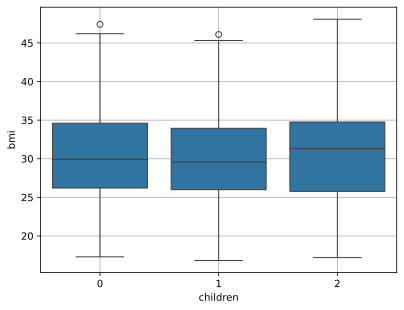

In [36]:
sns.boxplot(x="children", y="bmi", data=female_children)
plt.grid()
plt.show()

In [39]:
formula = 'bmi ~ C(children)'
model = ols(formula, female_children).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,24.590123,12.295062,0.334472,0.715858
Residual,563.0,20695.661583,36.759612,NaN,NaN


Conclusion. p-value is 0.715858 and it is greater than the alpha (0.05), therefore we fail to reject the null hypothesis and conclude that the mean bmi of women with no children, one child, and two children are the same.

##Example 4##
In this example, we will determine if the proportion of smokers is significantly different across the different regions.

First, let's define our null and alternative hypothesis.

𝐻
0
: Smokers proportions are not significantly different across the different regions.
𝐻
𝐴
: Smokers proportions are different across the different regions.

Here, we are comparing two different categorical variables, smokers/nonsmokers and different regions. For this type of analysis, we will perform a chi-square test.

First, we will calculate a contingency table between the proportions of smokers in different regions. For this, we will use pandas crosstab() function.

In [40]:
contingency= pd.crosstab(data.region, data.smoker)
contingency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


Next, let's plot the distribution of nonsmokers/smokers across 4 different regions using the plot() function.

<Axes: xlabel='region'>

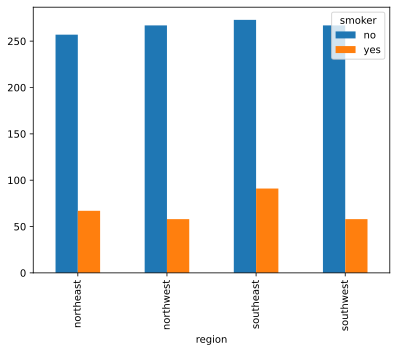

In [41]:
contingency.plot(kind='bar')

Now, using chi2_contingency() method, from the scipy.stats chi2_contingency, we will calculate chi-squared, p-value, degrees of freedom, and expected frequencies for our data.

In [42]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction = False)
print('chi-square statistic: {} , p_value: {} , degree of freedom: {} ,expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

chi-square statistic: 7.343477761407071 , p_value: 0.06171954839170541 , degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


Exercise 4
Based on the above results, print your conclusion statements whether to reject or accept the null hypothesis. What are your conclusions about the hypothesis?

In [43]:
# Use proper indentation when executing the code below

if (p_val < 0.05):
    print('Reject the null hypothesis, that the smokers proportions are not significantly different across the different regions')
else:
    print('Accept the null hypothesis, that the smokers proportions are not significantly different across the different regions')

Accept the null hypothesis, that the smokers proportions are not significantly different across the different regions


Conclusion: We failed to reject that the proportions of smokers are not significantly different across different regions. Therefore, the proportions of smokers are different across different regions.